#Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

##Procedures:

- 9.1 Introduction to Matplotlib
- 9.2 Plotting with Pandas
- 9.3 Pandas Plotting Subpackage

##Data Analysis:

Provide comments on output from the procedures above.

##Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

 - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

 - The second subplot will be a bar plot showing the net effect this had monthly, using resample().

 - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

 - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes-1.csv')

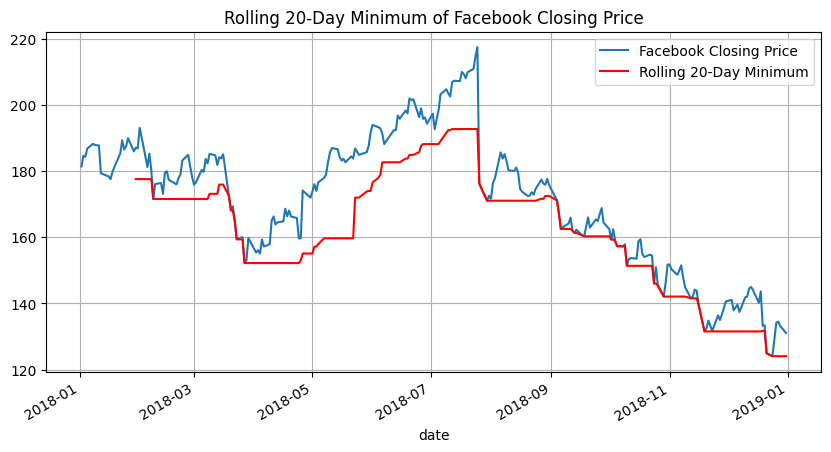

In [ ]:
rolling_min = fb['close'].rolling(window=20).min()
plt.figure(figsize=(10, 5))
fb['close'].plot(label='Facebook Closing Price')
rolling_min.plot(label='Rolling 20-Day Minimum', color='red')
plt.title('Rolling 20-Day Minimum of Facebook Closing Price')
plt.legend()
plt.grid(True)
plt.show()

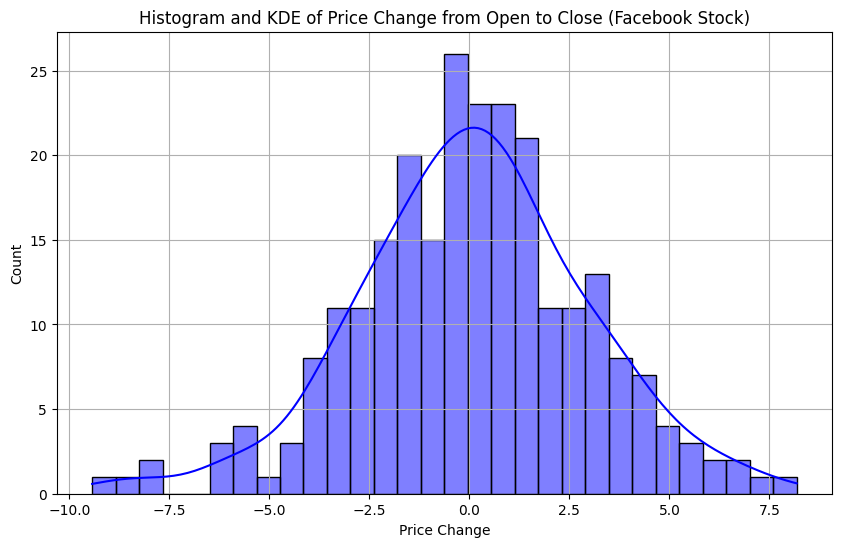

In [ ]:
import seaborn as sns
fb['Price Change'] = fb['close'] - fb['open']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(fb['Price Change'], kde=True, color='blue', bins=30)
plt.title('Histogram and KDE of Price Change from Open to Close (Facebook Stock)')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Magnitude')

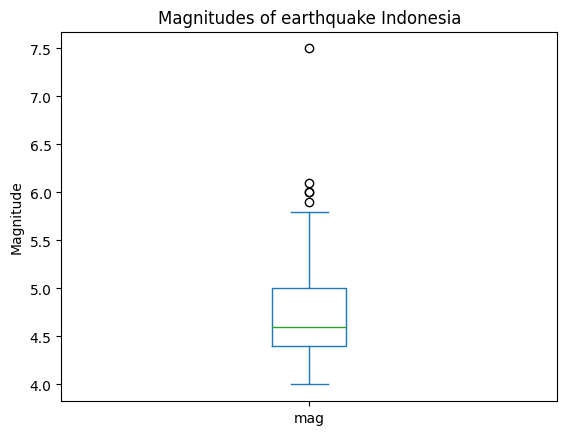

In [ ]:
indonesia_quakes = quakes[quakes['parsed_place'].str.contains('Indonesia', case=False, na=False)]

# Plot box plots for 'mag' and 'magType'
indonesia_quakes[['mag', 'magType']].plot(kind='box', title='Magnitudes of earthquake Indonesia')
plt.ylabel('Magnitude')

<Axes: title={'center': 'Difference between weekly maximum high price and weekly minimum low price'}, xlabel='Week', ylabel='Price Difference'>

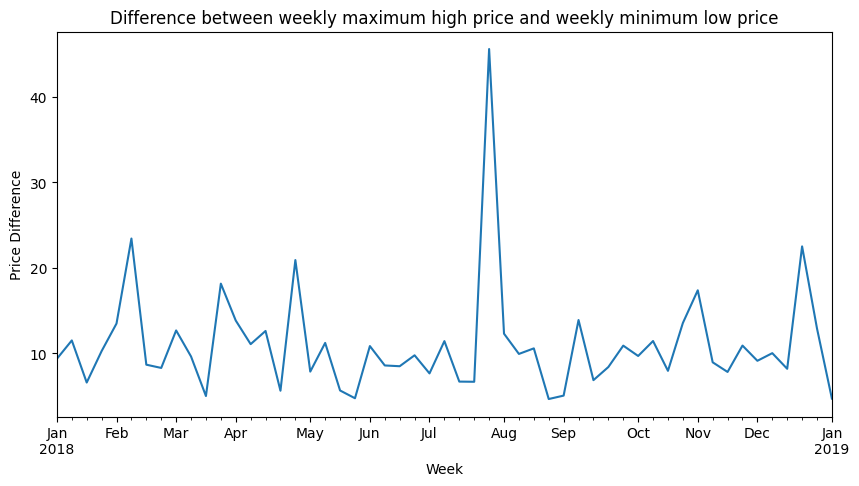

In [ ]:
weekly_fb = fb.resample('W').agg({'high': 'max', 'low': 'min'})

# Calculate the difference between the weekly maximum high price and minimum low price
weekly_fb['Difference'] = weekly_fb['high'] - weekly_fb['low']

# Plot the difference as a single line plot
weekly_fb['Difference'].plot(
    kind= 'line',
    figsize=(10, 5),
    ylabel = 'Price Difference',
    xlabel = 'Week',
    title = 'Difference between weekly maximum high price and weekly minimum low price'
)

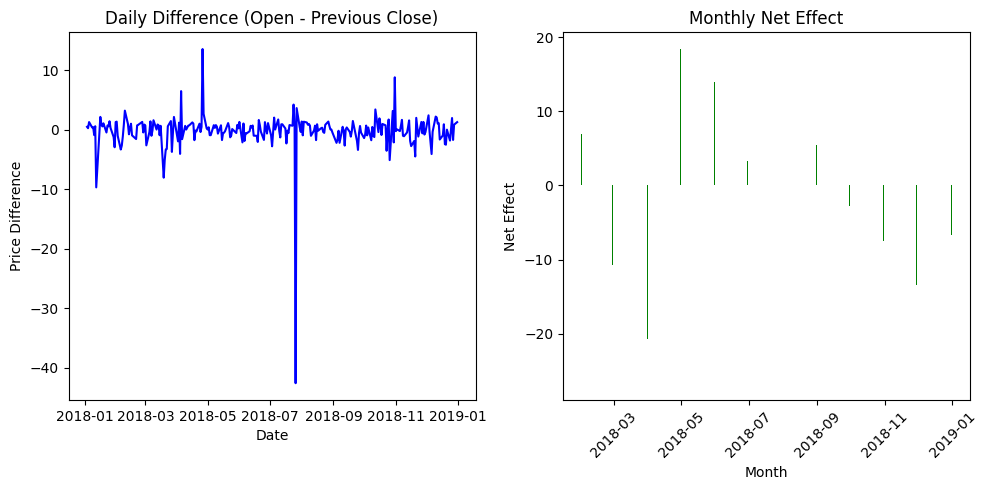

In [ ]:


# Calculate the daily differences
daily_diff = fb['open'] - fb['close'].shift(1)

# Calculate the monthly net effects
monthly_net = fb.resample('M').apply(lambda x: x['open'].iloc[-1] - x['close'].iloc[0])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot daily differences
axes[0].plot(daily_diff.index, daily_diff.values, color='blue')
axes[0].set_title('Daily Difference (Open - Previous Close)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Difference')

# Plot monthly net effects
axes[1].bar(monthly_net.index, monthly_net.values, color='green')
axes[1].set_title('Monthly Net Effect')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')

# Rotate x-axis labels for better readability
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##Summary/Conclusion:

During this HAO, I learned about Matplotlib, a sophisticated Python tool for data visualization. Matplotlib allowed me to generate numerous sorts of graphs to efficiently show data. In addition, I learnt about charting with Pandas, which allows for seamless connection of Pandas DataFrames with Matplotlib for more efficient charting. Furthermore, I investigated the Pandas Plotting Subpackage, which provides handy techniques for making plots straight from Pandas objects, streamlining the process of generating visual representations of data. Overall, this instruction helped me better grasp data visualization approaches and provided me with useful tools for successfully presenting and evaluating data.